In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
from tensorflow.keras.datasets import cifar10

In [85]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

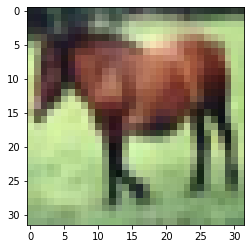

In [86]:
plt.imshow(x_train[7])

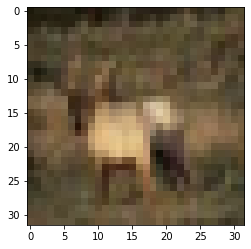

In [14]:
plt.imshow(x_train[3])

In [15]:
x_test.shape

(10000, 32, 32, 3)

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_train[0].shape

(32, 32, 3)

In [18]:
x_train.max()

255

In [19]:
x_train = x_train/255

In [20]:
x_test = x_test/255

In [21]:
## Labelling

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_cat_train = to_categorical(y_train,10)

In [24]:
y_cat_test = to_categorical(y_test,10)

In [27]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [28]:
## Building Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [35]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [42]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=15,callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 23s 468us/sample - loss: 0.6093 - accuracy: 0.7853 - val_loss: 1.0114 - val_accuracy: 0.6785
Epoch 2/15
50000/50000 [==============================] - 24s 473us/sample - loss: 0.5546 - accuracy: 0.8059 - val_loss: 1.0414 - val_accuracy: 0.6758
Epoch 3/15
50000/50000 [==============================] - 24s 482us/sample - loss: 0.5035 - accuracy: 0.8234 - val_loss: 1.1374 - val_accuracy: 0.6683
Epoch 4/15
50000/50000 [==============================] - 24s 482us/sample - loss: 0.4555 - accuracy: 0.8387 - val_loss: 1.1915 - val_accuracy: 0.6652


In [47]:
losses = pd.DataFrame(model.history.history)

In [48]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.609258,0.78532,1.011381,0.6785
1,0.554605,0.80592,1.041434,0.6758
2,0.503452,0.82338,1.137387,0.6683
3,0.455471,0.83872,1.191506,0.6652


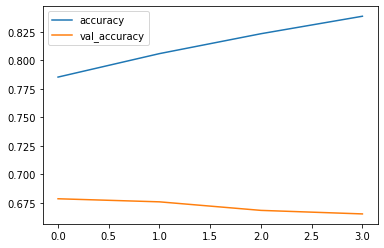

In [49]:
losses[['accuracy','val_accuracy']].plot()

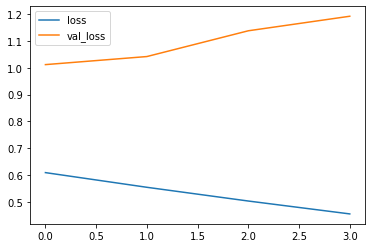

In [50]:
losses[['loss','val_loss']].plot()

In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
print(model.evaluate(x_test,y_cat_test))

10000/10000 [==============================] - 1s 63us/sample - loss: 1.1915 - accuracy: 0.6652
[1.1915063480377197, 0.6652]


In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
predictions = model.predict_classes(x_test)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1000
           1       0.86      0.69      0.76      1000
           2       0.57      0.57      0.57      1000
           3       0.48      0.52      0.50      1000
           4       0.60      0.66      0.63      1000
           5       0.62      0.48      0.54      1000
           6       0.83      0.68      0.75      1000
           7       0.78      0.69      0.73      1000
           8       0.69      0.83      0.75      1000
           9       0.67      0.78      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [57]:
confusion_matrix(y_test,predictions)

array([[743,  17,  57,  21,  16,   5,   7,   4,  99,  31],
       [ 36, 690,  13,  15,   2,   3,   8,   1,  84, 148],
       [ 87,   5, 573,  86,  86,  48,  34,  31,  35,  15],
       [ 31,  12,  77, 523, 100, 113,  37,  40,  30,  37],
       [ 29,   5,  81,  66, 662,  32,  28,  62,  19,  16],
       [ 23,   7,  78, 239,  75, 480,  14,  42,  17,  25],
       [ 14,   6,  64,  62,  70,  36, 682,  11,  24,  31],
       [ 27,   3,  40,  52,  81,  48,   7, 687,  11,  44],
       [ 83,  12,  14,   8,   9,   5,   0,   2, 830,  37],
       [ 57,  50,  13,  19,   8,   3,   3,   6,  59, 782]])

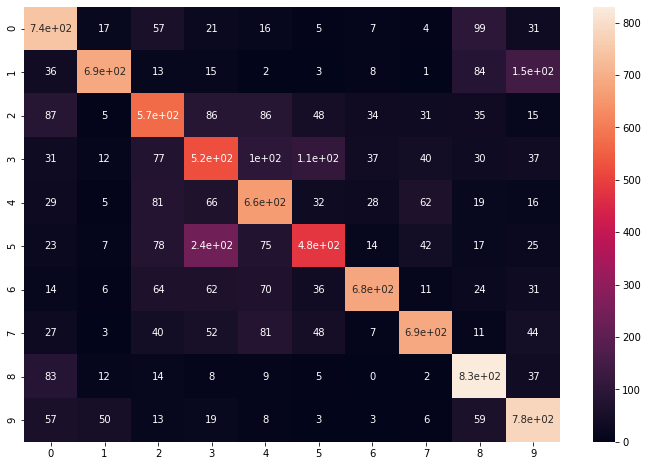

In [60]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [61]:
pic = x_test[16]

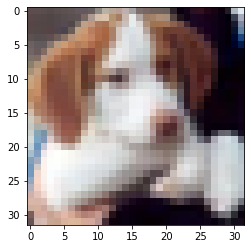

In [62]:
plt.imshow(pic)

In [64]:
model.predict_classes(pic.reshape(1,32,32,3))

array([5])

In [67]:
pic2 = x_test[8]

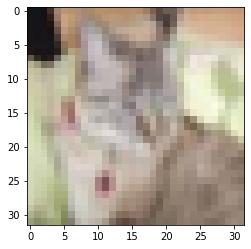

In [68]:
plt.imshow(pic2)

In [69]:
model.predict_classes(pic2.reshape(1,32,32,3))

array([3])

In [77]:
pic3 = x_test[9]

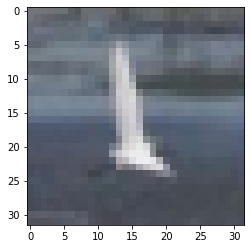

In [79]:
plt.imshow(x_test[7000])

In [81]:
model.predict_classes(x_test[4].reshape(1,32,32,3))

array([4])